In [1]:
#%pip install -r requirements.txt

import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

import seaborn as sns

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: C:\Users\Admin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [28]:
interest_rate = pd.read_csv('./data/interest_rate.csv')
energy_price = pd.read_csv('./data/energy_price.csv')
cpi = pd.read_csv('./data/cpi.csv')

In [3]:
interest_rate.head()

,location,interest_rate_long_term,year,month,interest_rate_short_term,interest_rate_immediate_term
0,AUS,7.177895,2000,1,5.66,5.00
1,AUS,6.957619,2000,2,5.80,5.48
2,AUS,6.570435,2000,3,5.89,5.50
3,AUS,6.264706,2000,4,6.04,5.72
4,AUS,6.465652,2000,5,6.31,5.98


In [31]:
energy_price.head()

,location,year,month,Thousand Dollars,Megawatthours,Count,Cents/kWh,Lagged 1 - Cents/kWh,Lagged 2 - Cents/kWh,Lagged 3 - Cents/kWh,Lagged 4 - Cents/kWh,Lagged 5 - Cents/kWh,Lagged 6 - Cents/kWh,Lagged 7 - Cents/kWh,Lagged 8 - Cents/kWh,Lagged 9 - Cents/kWh,Lagged 10 - Cents/kWh,Lagged 11 - Cents/kWh,Lagged 12 - Cents/kWh
0,US,2021,8,"22,168,583","158,634,041","138,446,332",13.97,14.19,14.11,14.12,13.75,13.72,13.83,14.47,14.77,14.92,15.42,15.46,15.95
1,US,2021,7,"21,542,208","155,309,157","138,311,825",13.87,13.97,14.19,14.11,14.12,13.75,13.72,13.83,14.47,14.77,14.92,15.42,15.46
2,US,2021,6,"18,393,637","132,820,257","138,320,005",13.85,13.87,13.97,14.19,14.11,14.12,13.75,13.72,13.83,14.47,14.77,14.92,15.42
3,US,2021,5,"14,101,163","101,489,132","137,431,855",13.89,13.85,13.87,13.97,14.19,14.11,14.12,13.75,13.72,13.83,14.47,14.77,14.92
4,US,2021,4,"12,960,789","94,177,116","137,610,383",13.76,13.89,13.85,13.87,13.97,14.19,14.11,14.12,13.75,13.72,13.83,14.47,14.77


In [35]:
df = interest_rate.merge(cpi, on=['location', 'year', 'month'], suffixes=('', '_delme'))
#df = df.merge(energy_price, on=['location', 'year', 'month'], suffixes=('', '_delme'))
df = df[[c for c in df.columns if not c.endswith('_delme')]]

In [ ]:
#Columns present in the dataset
df.columns

In [ ]:
#Checking for null values
df.isnull().sum()

In [37]:
#Checking datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   location                      91 non-null     object 
 1   interest_rate_long_term       91 non-null     float64
 2   year                          91 non-null     int64  
 3   month                         91 non-null     int64  
 4   interest_rate_short_term      91 non-null     float64
 5   interest_rate_immediate_term  91 non-null     float64
 6   cpi-index                     91 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 5.7+ KB


In [ ]:
#Stats of data
df.describe()

In [36]:
df.tail()

,location,interest_rate_long_term,year,month,interest_rate_short_term,interest_rate_immediate_term,cpi-index
86,AUS,1.28,2021,9,0.01,0.10,119.7
87,AUS,1.61,2021,12,0.06,0.10,121.3
88,AUS,2.50,2022,3,0.17,0.10,123.9
89,AUS,3.77,2022,6,1.60,0.73,126.1
90,AUS,3.74,2022,9,2.76,2.25,128.4


C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


,interest_rate_long_term,year,month,interest_rate_short_term,interest_rate_immediate_term,cpi-index,Cents/kWh,Lagged 1 - Cents/kWh,Lagged 2 - Cents/kWh,Lagged 3 - Cents/kWh,Lagged 4 - Cents/kWh,Lagged 5 - Cents/kWh,Lagged 6 - Cents/kWh,Lagged 7 - Cents/kWh,Lagged 8 - Cents/kWh,Lagged 9 - Cents/kWh,Lagged 10 - Cents/kWh,Lagged 11 - Cents/kWh,Lagged 12 - Cents/kWh
interest_rate_long_term,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
interest_rate_short_term,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
interest_rate_immediate_term,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cpi-index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cents/kWh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lagged 1 - Cents/kWh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lagged 2 - Cents/kWh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lagged 3 - Cents/kWh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


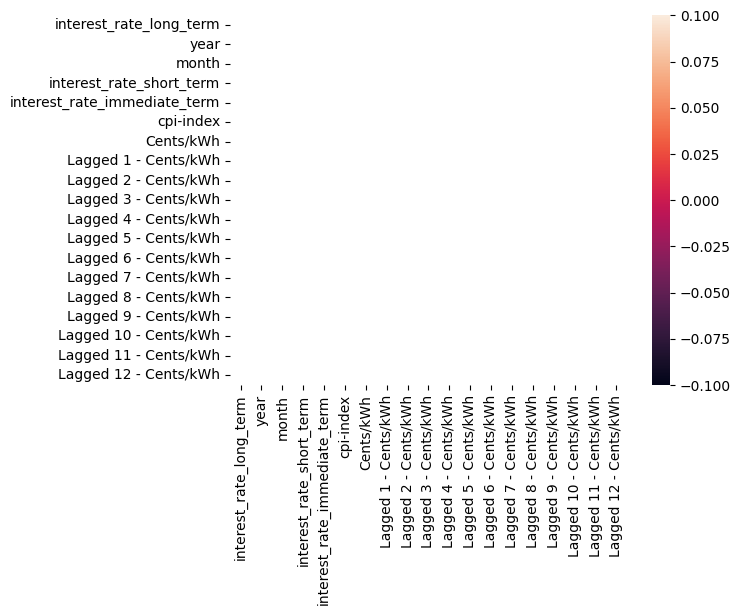

In [25]:
method='pearson'

sns.heatmap(df.corr(numeric_only=True,method=method))
df.corr(numeric_only=True,method=method)

array([<AxesSubplot: xlabel='year,month'>], dtype=object)

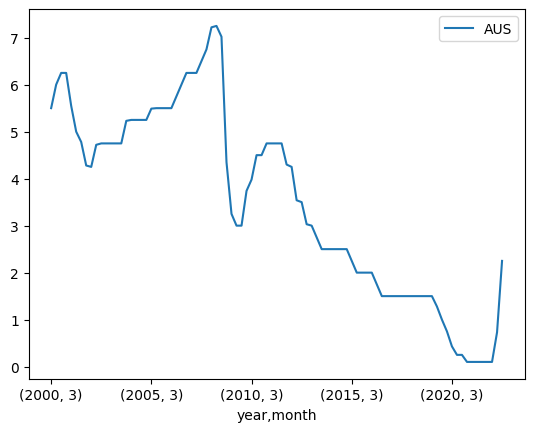

In [13]:
pd.pivot_table(df.reset_index(),
               index=['year','month'], columns='location', values='interest_rate_immediate_term'
              ).plot(subplots=True)

array([<AxesSubplot: xlabel='year,month'>], dtype=object)

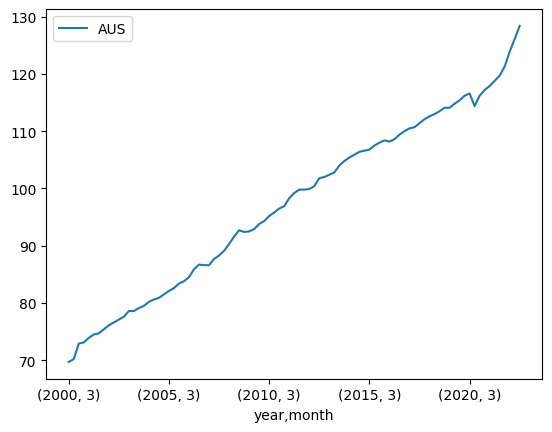

In [14]:
pd.pivot_table(df.reset_index(),
               index=['year','month'], columns='location', values='cpi-index'
              ).plot(subplots=True)

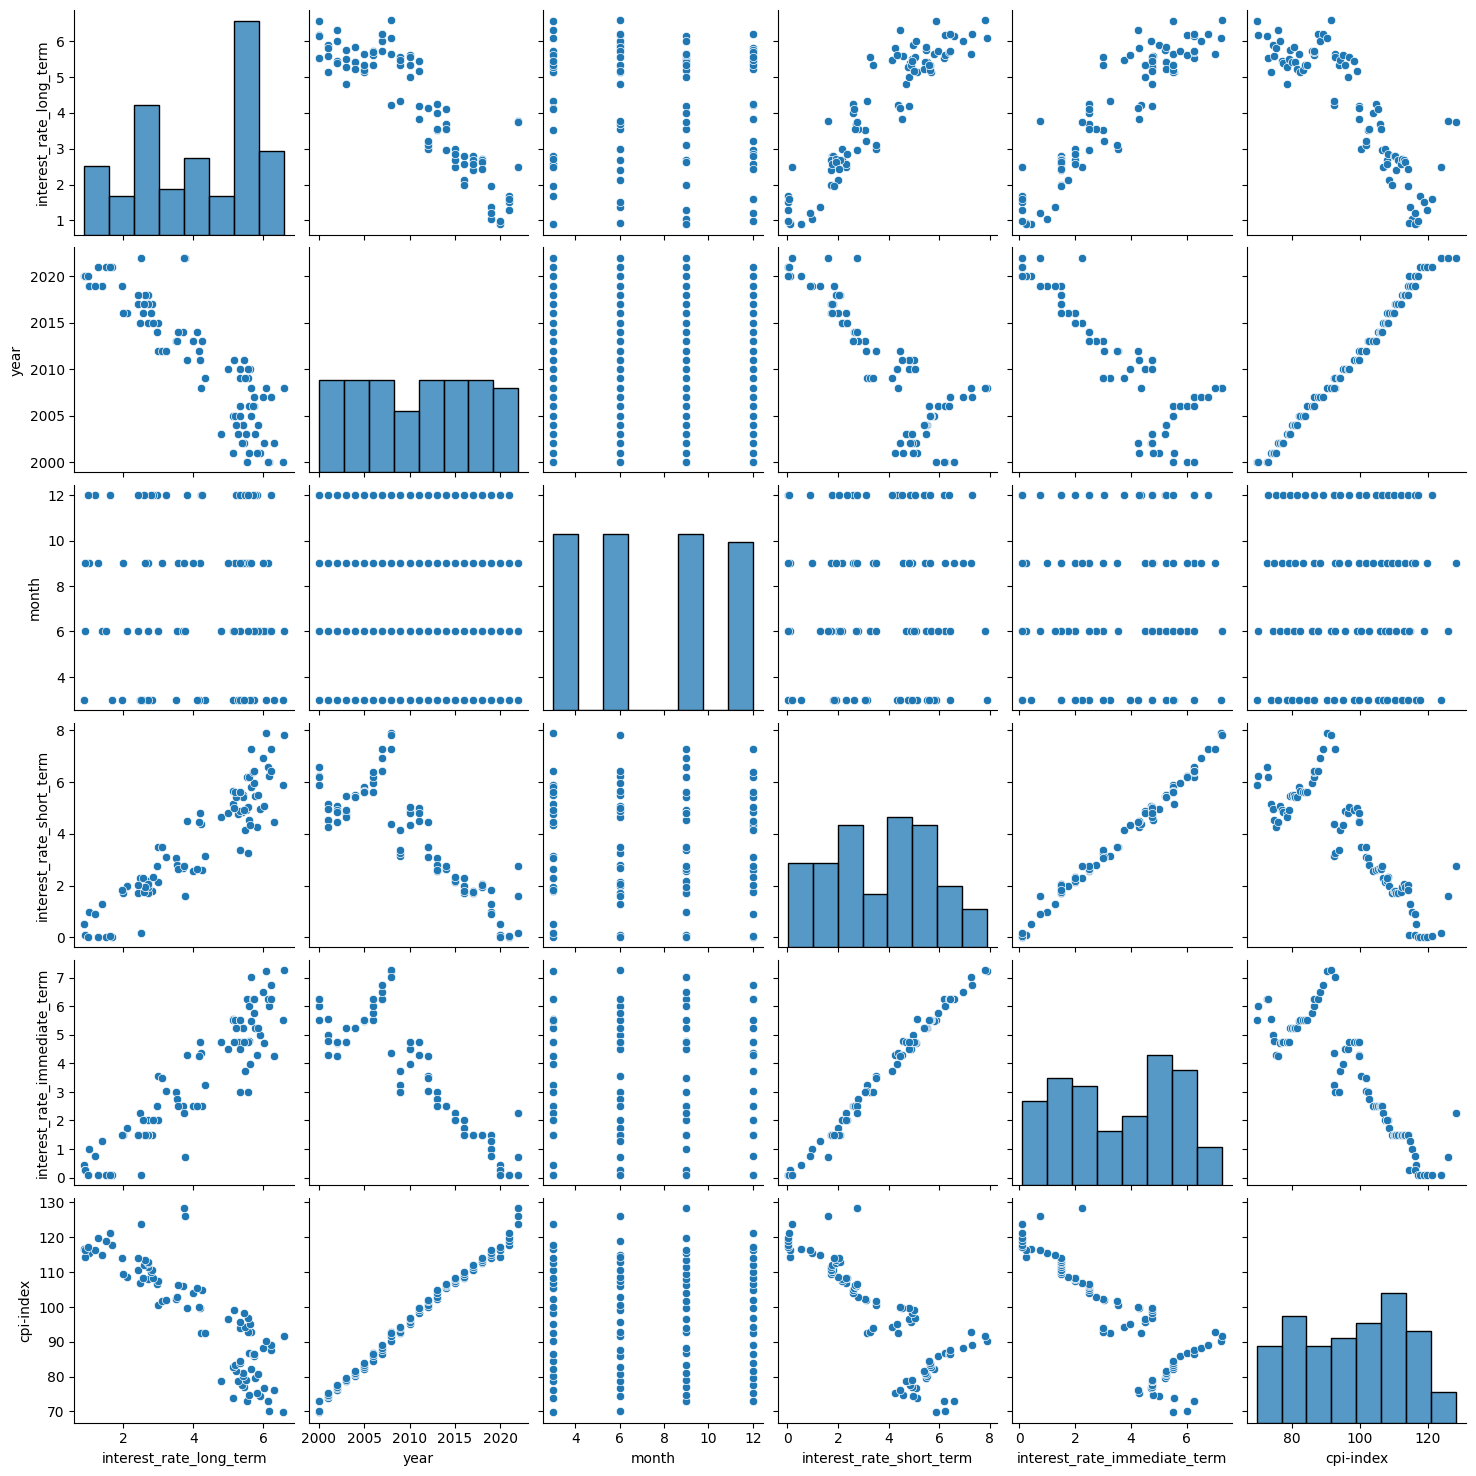

In [15]:
sns.pairplot(df)

In [ ]:
sns.barplot(x="location",y="interest_rate_immediate_term" , data = df)